In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [3]:
filename = "fish1.txt"
df = pd.read_csv(filename, sep= " ", header= None, index_col= None)
df.columns=["X","Y","Z"]
XX=np.floor(df.X)
YY=np.floor(df.Y)

In [4]:

print(YY)


0      2.0
1      1.0
2      2.0
3      1.0
4      0.0
      ... 
395    0.0
396    2.0
397    3.0
398    1.0
399    0.0
Name: Y, Length: 400, dtype: float64


In [5]:

# loan_amount = np.array(df,dtype='int') #setting up the array in numpy
# x ,y = np.unique(loan_amount,return_counts=True)
# plt.plot(x,y)
# plt.grid()

# plt.title('The number of fishes caught in one day')
# plt.xlabel('Time (hour)')
# plt.ylabel('Number of fishes caught')
# plt.show()


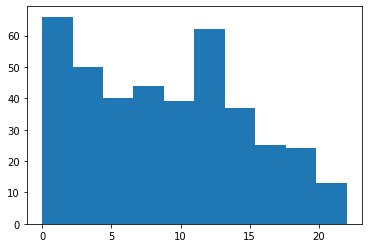

In [6]:
plt.hist(XX)
plt.show()

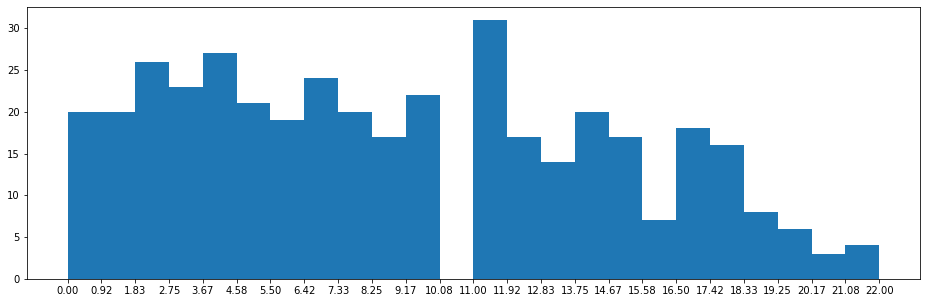

In [7]:
fig = plt.figure(figsize=(16,5))
n, bins, patches = plt.hist(XX,bins=24)
plt.xticks(bins)
plt.show()

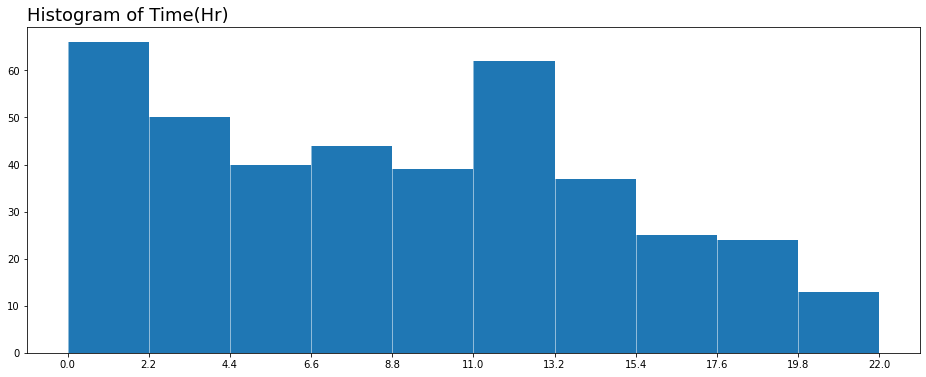

In [8]:
fig = plt.figure(figsize=(16,6))
n, bins, patches = plt.hist(XX)
plt.xticks(bins)
plt.grid(color='white', lw = 0.5, axis='x')
plt.title('Histogram of Time(Hr)', loc = 'left', fontsize = 18)
plt.show()

Text(0.0, 1.0, 'Histogram of Time(Hr)')

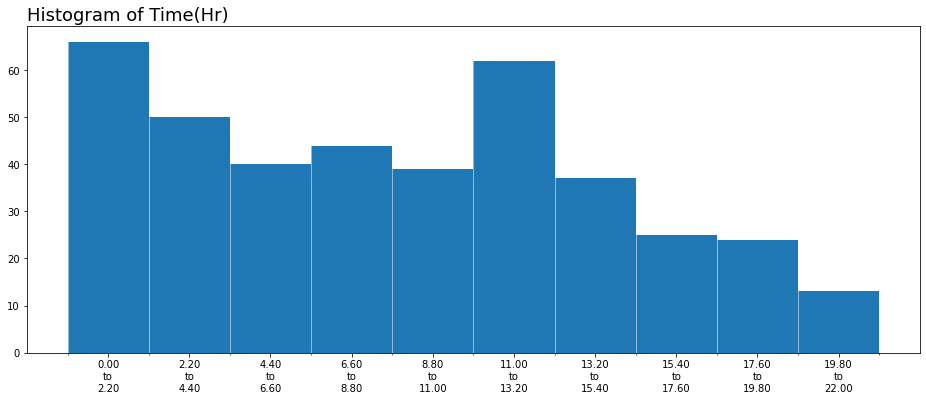

In [9]:
fig = plt.figure(figsize=(16,6))
n, bins, patches = plt.hist(XX)
# define minor ticks and draw a grid with them
minor_locator = AutoMinorLocator(2)
plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor', color='white', lw = 0.5)
# x ticks
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
#xticks = [(bins=24)]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)
plt.title('Histogram of Time(Hr)', loc = 'left', fontsize = 18)

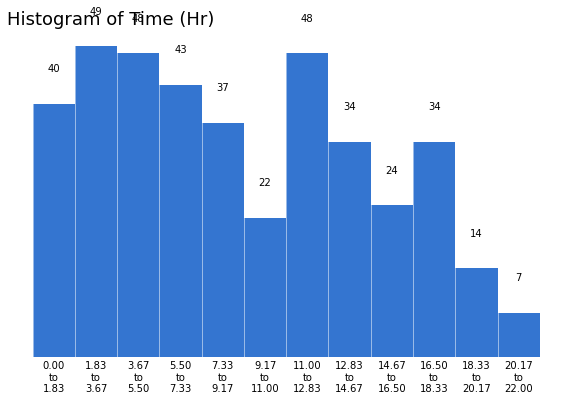

In [10]:
color_bars = '#3475D0'
fig, ax = plt.subplots(1, figsize=(10,6))

n, bins, patches = plt.hist(XX, color=color_bars, bins='doane')
# define minor ticks and draw a grid with them
minor_locator = AutoMinorLocator(2)
plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor', color='white', lw = 0.5)
# x ticks
#xticks = range(24)
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]

xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

ax.tick_params(axis='x', which='both',length=0)
# remove y ticks
plt.yticks([])
# Hide the right and top spines
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+5, int(value), ha='center')
plt.title('Histogram of Time (Hr)', loc = 'left', fontsize = 18)
plt.show()

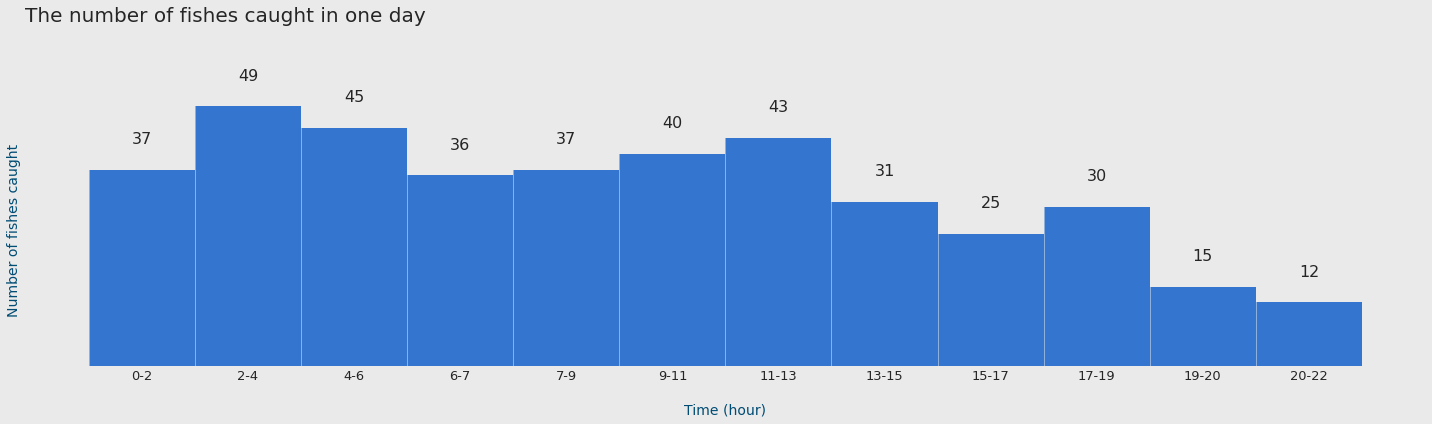

In [19]:
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'
fig, ax = plt.subplots(1, figsize=(20,6), facecolor=facecolor)
ax.set_facecolor(facecolor)
n, bins, patches = plt.hist(df.X, color=color_bars, bins='doane')
#grid
minor_locator = AutoMinorLocator(2)
plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor', color=facecolor, lw = 0.5)
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.0f}-{:.0f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels=xticks_labels, c=txt_color1, fontsize=13)
# remove major and minor ticks from the x axis, but keep the labels
ax.tick_params(axis='x', which='both',length=0)
# remove y ticks
plt.yticks([])
# Hide the right and top spines
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+5, int(value), ha='center', fontsize=16, c=txt_color1)
plt.title('The number of fishes caught in one day\n\n\n', loc = 'left', fontsize = 20, c=txt_color1)
plt.xlabel('\nTime (hour)', c=txt_color2, fontsize=14)
plt.ylabel('Number of fishes caught', c=txt_color2, fontsize=14)

plt.tight_layout()
#plt.savefig('costs.png', facecolor=facecolor)

([<matplotlib.axis.XTick at 0x1cdb9b9a3a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

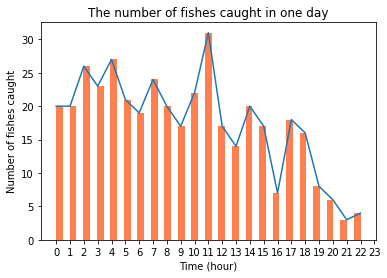

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# change all time to minutes 
array = []
df = pd.DataFrame(df['X']);
for index, row in df.iterrows():
    minute = int(60*int(str(row['X']).split('.')[1])/100)
    minute = str(minute).split('.')[0]
    hour = str(row['X']).split('.')[0]
    array.append(np.floor(float(hour + '.' + minute)))
    
loan_amount = np.array(df,dtype='int') #setting up the array in numpy
x ,y = np.unique(loan_amount,return_counts=True)
plt.plot(x,y)

plt.hist(array, color= 'coral', bins = 45)

plt.title('The number of fishes caught in one day')
plt.xlabel('Time (hour)')
plt.ylabel('Number of fishes caught')
plt.grid(b=False)

plt.xticks(np.arange(0, 24, 1), horizontalalignment='center')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
[20 20 26 23 27 21 19 24 20 17 22 31 17 14 20 17  7 18 16  8  6  3  4]


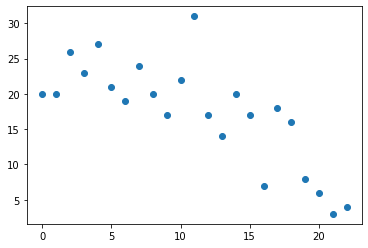

In [13]:
#loan_amount = cur.fetchall()
loan_amount = np.array(df,dtype='int') #setting up the array in numpy
x ,y  = np.unique(loan_amount, return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)
print(x)
print(y)
# 

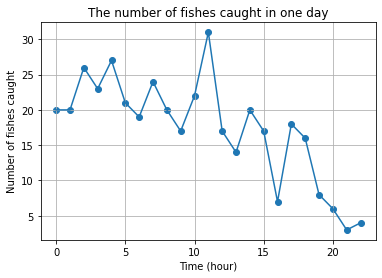

In [14]:
loan_amount = np.array(df,dtype='int') #setting up the array in numpy
x ,y = np.unique(loan_amount,return_counts=True)
plt.plot(x,y)

plt.scatter(x,y)

plt.grid()

plt.title('The number of fishes caught in one day')
plt.xlabel('Time (hour)')
plt.ylabel('Number of fishes caught')
plt.show()


In [ ]:
# change all time to minutes 
# array = []
# dfy = pd.DataFrame(df['Y']);
# for index, row in dfy.iterrows():
#     minute = int(60*int(str(row['Y']).split('.')[1])/100)
#     minute = str(minute).split('.')[0]
#     hour = str(row['Y']).split('.')[0]
#     array.append(np.floor(float(hour + '.' + minute)))

# loan_amount = np.array(dfy,dtype='int') #setting up the array in numpy
# x ,y = np.unique(loan_amount,return_counts=True)
# plt.plot(x,y)
# plt.grid()

# plt.title('The number of fishes caught in one day')
# plt.xlabel('Time (hour)')
# plt.ylabel('Number of fishes caught')
# plt.show()
